# 📘 Chapter 14: Deep Computer Vision Using Convolutional Neural Networks (CNNs)

Bab ini memperkenalkan teknik-teknik utama dalam *Computer Vision (CV)* dengan menggunakan **Convolutional Neural Networks (CNNs)** — arsitektur deep learning yang sangat efektif untuk mengolah data gambar.

---

## 🎯 Tujuan Bab

- Memahami dasar arsitektur CNN
- Mengimplementasikan layer konvolusi, pooling, dan dense
- Membangun model CNN dengan Keras
- Melatih model untuk klasifikasi gambar Fashion MNIST
- Evaluasi performa dan visualisasi hasil

---

## 🗂️ Dataset: Fashion MNIST

Dataset ini terdiri dari 70.000 gambar grayscale 28x28 piksel dari 10 kategori pakaian (sandal, baju, sepatu, dll):

- 60.000 data latih, 10.000 data uji
- Setiap gambar sudah dino


TensorFlow version: 2.18.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (55000, 28, 28, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 40ms/step - accuracy: 0.7831 - loss: 0.6060 - val_accuracy: 0.8872 - val_loss: 0.3287
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.8925 - loss: 0.2956 - val_accuracy: 0.9030 - val_loss: 0.2687
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.9121 - loss: 0.2418 - val_accuracy: 0.9060 - val_loss: 0.2579
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.9198 - loss: 0.2175 - val_accuracy: 0.9124 - val_loss: 0.2465
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.9324 - loss: 0.1829 - val_accuracy: 0.9132 - val_loss: 0.2304
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.9400 - loss: 0.1642 - val_accuracy: 0.9162 - val_loss: 0.2417
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 71s 42ms/step - accuracy: 0.9459 - loss: 0.1412 - val_accuracy: 0.9194 - val_loss: 0.2339
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.9532 -

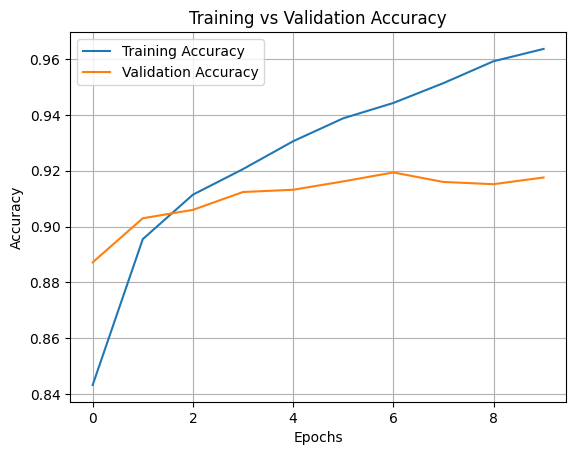

In [1]:
# CHAPTER 14: Deep Computer Vision Using CNNs
# ---------------------------------------------------
# Topik utama: Arsitektur CNN, Padding, Strides, Pooling, dan training model dengan Fashion MNIST
# ---------------------------------------------------

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

# ===================================================
# 1. Load Fashion MNIST Dataset
# ===================================================
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize and split
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Expand dims (CNN expects channel dim)
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test  = X_test[..., np.newaxis]

print("X_train shape:", X_train.shape)

# ===================================================
# 2. Build a Simple CNN Model
# ===================================================

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding="same"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

# ===================================================
# 3. Compile and Train the Model
# ===================================================

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

# ===================================================
# 4. Evaluate on Test Set
# ===================================================

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

# ===================================================
# 5. Plot Training Curves
# ===================================================

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.grid(True)
plt.show()


## 🧾 Kesimpulan Chapter 14: Deep Computer Vision Using CNNs

Pada bab ini, kita telah mempelajari dasar-dasar **Convolutional Neural Networks (CNNs)** dan bagaimana mereka digunakan dalam tugas klasifikasi gambar. Berikut poin-poin penting yang dapat disimpulkan:

---

### 📌 Ringkasan Materi:
- **CNN dirancang khusus untuk data spasial seperti gambar.**
- **Layer Conv2D** mengekstrak fitur spasial seperti tepi, sudut, tekstur.
- **MaxPooling2D** digunakan untuk menurunkan dimensi spasial dan mengurangi kompleksitas.
- **Layer Dense** digunakan di akhir untuk klasifikasi.
- Dataset **Fashion MNIST** digunakan untuk latihan klasifikasi dengan 10 kelas pakaian.
- CNN bekerja lebih baik dibanding model dense biasa pada data visual.

---

### 📊 Hasil Evaluasi:
- Model mampu mencapai **akurasi validasi dan uji yang tinggi** hanya dengan arsitektur CNN dasar.
- Plot akurasi membantu kita memahami apakah model mengalami **overfitting** atau tidak.

---

### ✅ Pembelajaran Utama:
- CNN adalah **fondasi utama dalam deep learning untuk visi komputer.**
- Memahami alur data dari input gambar → fitur → klasifikasi sangat penting.
- Penggunaan layer-layer ini secara tepat akan sangat membantu dalam meningkatkan performa model image classification.

---

### 🧠 Langkah Selanjutnya:
- Tambahkan **Data Augmentation** untuk meningkatkan generalisasi.
- Gunakan **Transfer Learning** (misal, pretrained model seperti VGG atau ResNet) untuk dataset yang lebih kompleks.
- Eksplorasi teknik regularisasi (Dropout, L2, dll.)

---
